### Required Library

In [1]:
library(ggplot2)


Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”


In [2]:
packageVersion("ggplot2")

[1] ‘3.3.5’

### Function

In [3]:
foldplot <- function(df,width=6,height=6,dpi=300,pval_col="p_val_adj",pval_thres=1,lfc_col="avg_log2FC",lfc_pos_thres=NULL,lfc_neg_thres=NULL,cluster_col="Cluster",
                    gene_col="genes",pch=21,clusters=NULL,genes=NULL,return.data = FALSE){
    
#pval_col defines the column in the data frame containing the p-values
#pval_thres defines the maximum p-value allowed. 1 by default means no filtering will occur based on this variable
#lfc_col defines the column in the data frame containing the log fold changes.
#lfc_pos_thres defines the minimum lfc value for condition A. Providing a negative value sets the maximum lfc for condition B 
#lfc_pos_thres defines the maximum lfc value for condition A. Providing a negative value sets the minimum lfc for condition B
#cluster_col defines the column in the data frame containing cluster names.
#gene_col defines the column in the data frame containing gene names.
#clusters confines to desired clusters. Example clusters=c("clusterA","clusterC")
#genes confines to specific genes. Example genes=c("GENEA","GENEB")
#return.data stores the filtered data frame and corresponding plot
    
    df2=df
    options(repr.plot.width = width, repr.plot.height = height, repr.plot.res = dpi)
    min_pval=min(df2[pval_col][df2[pval_col]>0])
    df2["log_pval"]=-log10((min_pval*0.1)+df2[pval_col])
    min_logp=min(df2$log_pval)
    max_logp=max(df2$log_pval)
    df2=df2[df2[pval_col]<pval_thres,]
        
    if (!is.null(lfc_pos_thres) & is.null(lfc_neg_thres)){
    
        df2=df2[df2[lfc_col]>=lfc_pos_thres,]
        }
    
    if (is.null(lfc_pos_thres) & !is.null(lfc_neg_thres)){
    
        df2=df2[df2[lfc_col]<=lfc_neg_thres,]
        }
    
    if (!is.null(lfc_pos_thres) & !is.null(lfc_neg_thres)){
    
        df2=df2[which(df2[lfc_col]<=lfc_neg_thres|df2[lfc_col]>=lfc_pos_thres),]
        }
        
    if (!is.null(clusters)){
        
        df2["cluster"] <- df2[cluster_col]
        df2 <- df2[which(df2$cluster %in% clusters),]
        df2 <- df2[ , !(names(df2) %in% "cluster")]
        }
    
    if (!is.null(genes)){
        
        df2["gene"] <- df2[gene_col]
        df2 <- df2[which(df2$gene %in% genes),]
        df2 <- df2[ , !(names(df2) %in% "gene")]
        }
        

        
    border_ldFC <- ceiling(max(abs(df2[lfc_col])))

    g <- ggplot() + 
        geom_point(data=df2, aes(x=.data[[gene_col]], y=.data[[cluster_col]], fill=.data[[lfc_col]], size=log_pval), colour="black",pch=pch, stroke=0.5) + 
        theme(
              axis.text.x=element_text(size=20, color="black", angle=90, hjust=1, face = "italic"),
              axis.title=element_text(size=20, color="black", face = "bold"),
              axis.text.y=element_text(size=20, color="black", face = "italic"),
              axis.ticks.y=element_line(color="black"),
              plot.title = element_text(size = 25, face = "bold"),
              legend.title=element_text(size=18, face = "bold"), 
              legend.text=element_text(size=18),
              panel.background = element_rect(fill = NA, color="black"),
              panel.grid.major = element_blank(),
              panel.grid.minor = element_blank()
             ) + scale_fill_gradient2(low="#6699FF", mid = "white", high="#FF6600", 
                                      breaks=c(-border_ldFC,0,border_ldFC), 
                                      limits=c(-border_ldFC,border_ldFC)) + xlab("")+ ylab("") + 
    scale_size(range = c(1,10),limits= c(min_logp,max_logp)) 
    
    if (return.data) {
    return(list(data = df2, gg = g))
      } else {
    return(g)
    }
    
    rm (df2)
    rm (border_ldFC)
    rm (min_logp)
    rm (max_logp)
    
    
    }

### Load dataset

In [4]:
#dataset should consist of a DGE table, comparing two conditions, with p-values and fold changes

In [5]:
df=read.csv("lung_cell_states_COVID19_DEG_clean.csv",h=T)

In [6]:
tail(df,10)

,Cluster,genes,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,FC
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21962,Capillary EC 1,ZSWIM6,0.000000e+00,2.069294,0.516,0.157,0.00e+00,4.1958128
21963,Aerocytes,ZSWIM6,0.000000e+00,1.880032,0.500,0.171,0.00e+00,3.6798326
21964,Alveolar Type 2.3,ZSWIM6,2.166966e-03,1.821333,0.265,0.218,1.00e+00,3.5330749
21965,Capillary EC 2,ZSWIM6,8.240000e-184,1.743843,0.433,0.209,5.37e-179,3.3482618
21966,Arterial EC,ZSWIM6,6.930000e-126,1.633289,0.447,0.195,4.52e-121,3.1011947
21967,Capillary EC 3,ZSWIM6,1.270000e-130,1.599989,0.483,0.301,8.27e-126,3.0304097
21968,Venous EC,ZSWIM6,4.370000e-67,1.375754,0.316,0.176,2.85e-62,2.5940345
21969,Fibroblast Adventitial,ZSWIM6,2.780000e-70,1.350774,0.277,0.172,1.81e-65,2.5494898
21970,Lymphatic EC,ZSWIM6,2.320000e-50,1.049262,0.402,0.268,1.51e-45,2.0684713


### No filtering

In [7]:
plot=foldplot(df,width=20,height=20,dpi=300,pval_col="p_val_adj",pval_thres=1,lfc_col="avg_log2FC",lfc_pos_thres=NULL,lfc_neg_thres=NULL,cluster_col="Cluster",
                    gene_col="genes",pch=21,clusters=NULL,genes=NULL,return.data=TRUE)

In [8]:
nrow(plot$data)

[1] 20149

In [9]:
tail(plot$data,10)

,Cluster,genes,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,FC,log_pval
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21961,CTHRC1+ 2,ZRANB2,1.01e-22,1.174882,0.341,0.269,6.56e-18,2.2567446,17.18310
21962,Capillary EC 1,ZSWIM6,0.00e+00,2.069294,0.516,0.157,0.00e+00,4.1958128,303.49080
21963,Aerocytes,ZSWIM6,0.00e+00,1.880032,0.500,0.171,0.00e+00,3.6798326,303.49080
21965,Capillary EC 2,ZSWIM6,8.24e-184,1.743843,0.433,0.209,5.37e-179,3.3482618,178.27003
21966,Arterial EC,ZSWIM6,6.93e-126,1.633289,0.447,0.195,4.52e-121,3.1011947,120.34486
21967,Capillary EC 3,ZSWIM6,1.27e-130,1.599989,0.483,0.301,8.27e-126,3.0304097,125.08249
21968,Venous EC,ZSWIM6,4.37e-67,1.375754,0.316,0.176,2.85e-62,2.5940345,61.54516
21969,Fibroblast Adventitial,ZSWIM6,2.78e-70,1.350774,0.277,0.172,1.81e-65,2.5494898,64.74232
21970,Lymphatic EC,ZSWIM6,2.32e-50,1.049262,0.402,0.268,1.51e-45,2.0684713,44.82102


### Keep only p-value<1e-100

In [10]:
plot=foldplot(df,width=20,height=20,dpi=300,pval_col="p_val_adj",pval_thres=1e-100,lfc_col="avg_log2FC",lfc_pos_thres=NULL,lfc_neg_thres=NULL,cluster_col="Cluster",
                    gene_col="genes",pch=21,clusters=NULL,genes=NULL,return.data=TRUE)

In [11]:
nrow(plot$data)

[1] 9307

In [12]:
tail(plot$data,10)

,Cluster,genes,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,FC,log_pval
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21949,Alveolar Type 1,ZNF91,4.39e-284,1.154799,0.354,0.198,2.86e-279,2.2255329,278.5436
21954,Capillary EC 1,ZNHIT1,3.36e-189,-1.098266,0.085,0.283,2.19e-184,0.4660776,183.6596
21955,Aerocytes,ZNHIT1,1.30e-235,-1.133866,0.085,0.373,8.46e-231,0.4546928,230.0726
21956,Capillary EC 1,ZNRF1,1.83e-178,2.156825,0.253,0.083,1.19e-173,4.4583232,172.9245
21962,Capillary EC 1,ZSWIM6,0.00e+00,2.069294,0.516,0.157,0.00e+00,4.1958128,303.4908
21963,Aerocytes,ZSWIM6,0.00e+00,1.880032,0.500,0.171,0.00e+00,3.6798326,303.4908
21965,Capillary EC 2,ZSWIM6,8.24e-184,1.743843,0.433,0.209,5.37e-179,3.3482618,178.2700
21966,Arterial EC,ZSWIM6,6.93e-126,1.633289,0.447,0.195,4.52e-121,3.1011947,120.3449
21967,Capillary EC 3,ZSWIM6,1.27e-130,1.599989,0.483,0.301,8.27e-126,3.0304097,125.0825


### Removing results with -2<LFC<2

In [13]:
plot=foldplot(df,width=20,height=20,dpi=300,pval_col="p_val_adj",pval_thres=1e-100,lfc_col="avg_log2FC",lfc_pos_thres=2,lfc_neg_thres=-2,cluster_col="Cluster",
                    gene_col="genes",pch=21,clusters=NULL,genes=NULL,return.data=TRUE)

In [14]:
nrow(plot$data)

[1] 4254

In [15]:
tail(plot$data,10)

,Cluster,genes,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,FC,log_pval
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21855,Mesothelial,ZNF385B,1.22e-127,-3.280028,0.070,0.430,7.96e-123,0.1019469,122.0991
21857,Capillary EC 1,ZNF407,1.22e-266,2.499623,0.270,0.057,7.96e-262,5.6543773,261.0991
21859,Aerocytes,ZNF407,5.17e-169,2.172162,0.261,0.071,3.37e-164,4.5059832,163.4724
21887,Capillary EC 2,ZNF608,1.61e-152,2.479528,0.273,0.088,1.05e-147,5.5761496,146.9788
21888,Capillary EC 1,ZNF608,0.00e+00,2.362639,0.417,0.122,0.00e+00,5.1421023,303.4908
21897,Capillary EC 1,ZNF609,1.10e-229,2.115011,0.295,0.090,7.16e-225,4.3309322,224.1451
21908,Capillary EC 2,ZNF638,2.23e-165,2.212927,0.397,0.205,1.45e-160,4.6351491,159.8386
21909,Aerocytes,ZNF638,2.09e-229,2.168020,0.416,0.175,1.36e-224,4.4930625,223.8665
21956,Capillary EC 1,ZNRF1,1.83e-178,2.156825,0.253,0.083,1.19e-173,4.4583232,172.9245


### Show results only for the Mesothelial and Aerocytes clusters

In [16]:
plot=foldplot(df,width=20,height=20,dpi=300,pval_col="p_val_adj",pval_thres=1e-100,lfc_col="avg_log2FC",lfc_pos_thres=2,lfc_neg_thres=-2,cluster_col="Cluster",
                    gene_col="genes",pch=21,clusters=c("Mesothelial","Aerocytes"),genes=NULL,return.data=TRUE)

In [17]:
nrow(plot$data)

[1] 577

In [18]:
tail(plot$data,10)

,Cluster,genes,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,FC,log_pval
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21533,Aerocytes,YIPF3,0.00e+00,-2.130198,0.053,0.390,0.00e+00,0.227426560,303.4908
21607,Aerocytes,ZCCHC7,6.26e-155,2.204753,0.285,0.100,4.08e-150,4.608955230,149.3893
21719,Aerocytes,ZFP36,0.00e+00,-2.686436,0.231,0.748,0.00e+00,0.154346765,303.4908
21730,Aerocytes,ZFP36L2,0.00e+00,-2.246089,0.071,0.403,0.00e+00,0.209794818,303.4908
21731,Aerocytes,ZFPM2,2.25e-252,2.226770,0.350,0.089,1.46e-247,4.679849339,246.8356
21763,Aerocytes,ZMYM2,7.27e-134,2.123283,0.273,0.104,4.74e-129,4.355842980,128.3242
21797,Aerocytes,ZMYM6NB,0.00e+00,-10.790393,0.000,0.368,0.00e+00,-0.000435365,303.4908
21855,Mesothelial,ZNF385B,1.22e-127,-3.280028,0.070,0.430,7.96e-123,0.101946888,122.0991
21859,Aerocytes,ZNF407,5.17e-169,2.172162,0.261,0.071,3.37e-164,4.505983162,163.4724


### Show results only for the Mesothelial and Aerocytes clusters and select genes

In [19]:
plot=foldplot(df,width=6,height=6,dpi=300,pval_col="p_val_adj",pval_thres=1e-100,lfc_col="avg_log2FC",lfc_pos_thres=2,lfc_neg_thres=-2,cluster_col="Cluster",
                    gene_col="genes",pch=21,clusters=c("Mesothelial","Aerocytes"),genes=c("WIF1","TCF12","XPR1","ZFP36"),return.data=TRUE)

In [20]:
#show full dataframe
plot$data

,Cluster,genes,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,FC,log_pval
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
19294,Aerocytes,TCF12,0.00e+00,2.324357,0.525,0.149,0.00e+00,5.00742557,303.4908
21328,Mesothelial,WIF1,6.27e-180,-6.042506,0.004,0.333,4.09e-175,0.01417136,174.3883
21457,Aerocytes,XPR1,5.16e-161,2.359234,0.263,0.078,3.36e-156,5.12997883,155.4737
21719,Aerocytes,ZFP36,0.00e+00,-2.686436,0.231,0.748,0.00e+00,0.15434676,303.4908


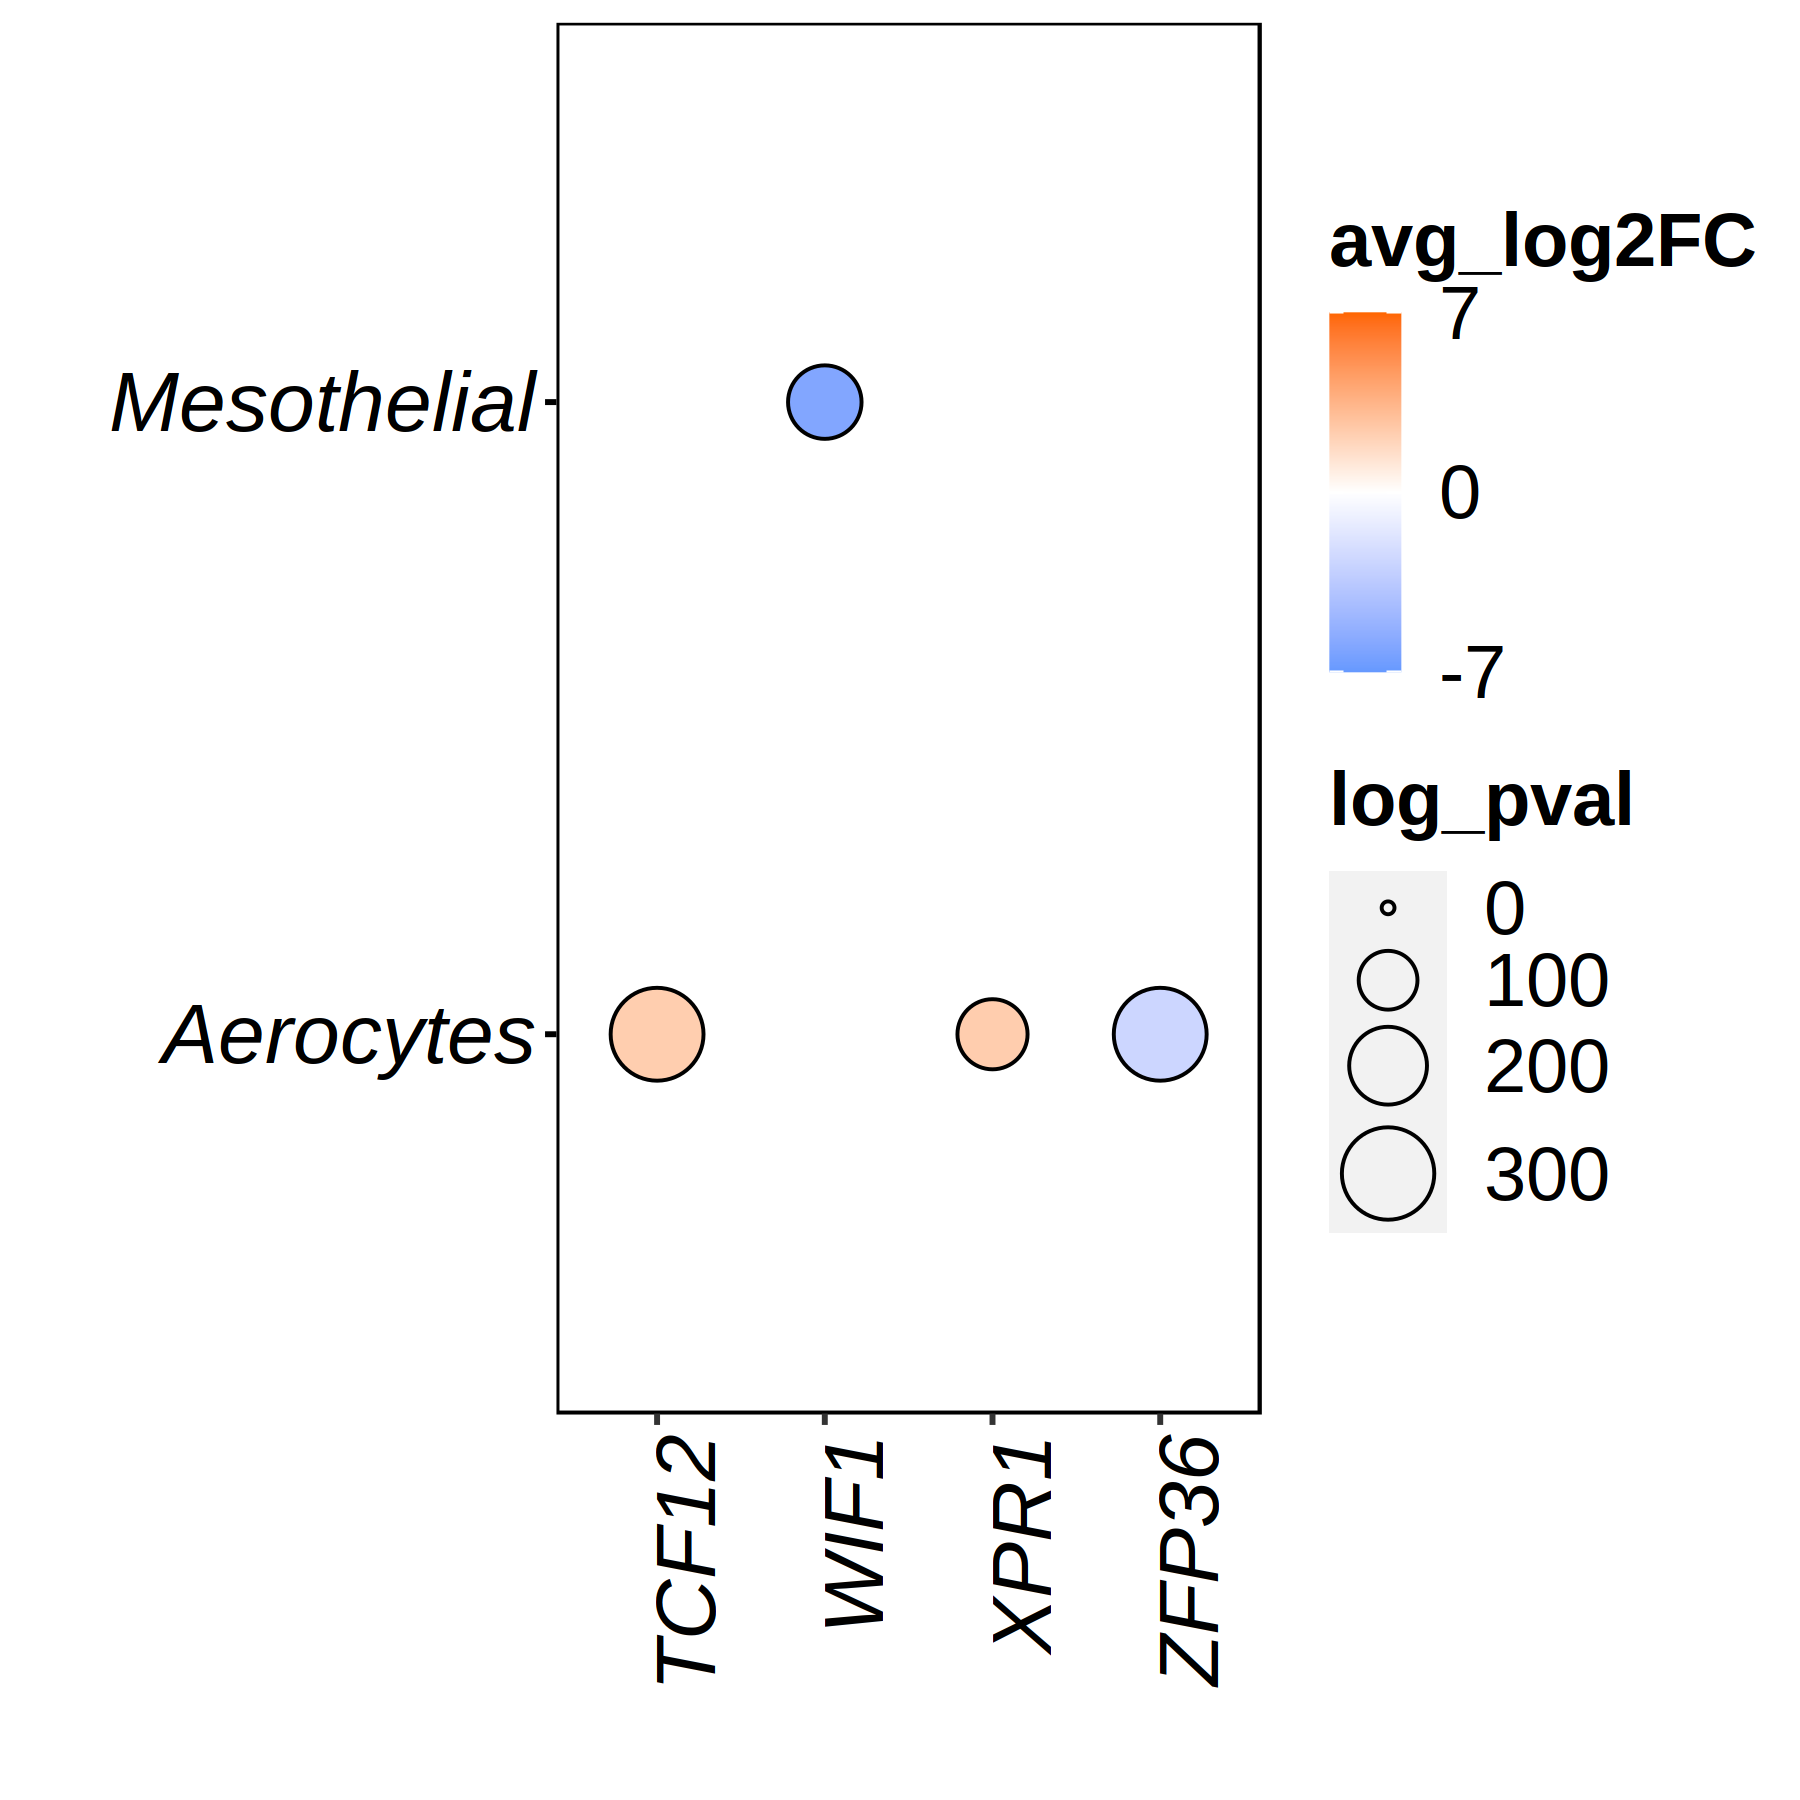

In [21]:
#display plot
plot$gg

In [22]:
#save plot to pdf

pdf(width=6,height=6,file="foldplot.pdf")
foldplot(df,width=6,height=6,dpi=300,pval_col="p_val_adj",pval_thres=1e-100,lfc_col="avg_log2FC",lfc_pos_thres=2,lfc_neg_thres=-2,cluster_col="Cluster",
                    gene_col="genes",pch=21,clusters=c("Mesothelial","Aerocytes"),genes=c("WIF1","TCF12","XPR1","ZFP36"),return.data=FALSE)
dev.off()

png 
  2

In [23]:
#export filtered datafrane

write.csv(plot$data,"foldplot.csv")

In [24]:
R.Version()

$platform
[1] "x86_64-conda-linux-gnu"

$arch
[1] "x86_64"

$os
[1] "linux-gnu"

$system
[1] "x86_64, linux-gnu"

$status
[1] ""

$major
[1] "4"

$minor
[1] "1.0"

$year
[1] "2021"

$month
[1] "05"

$day
[1] "18"

$`svn rev`
[1] "80317"

$language
[1] "R"

$version.string
[1] "R version 4.1.0 (2021-05-18)"

$nickname
[1] "Camp Pontanezen"